In [144]:
matplotlib inline

In [145]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import math as M

In [146]:
# figure size chage
#from pylab import rcParams
#rcParams['figure.figsize'] = 11,8

In [147]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

In [148]:
from obspy import read
from obspy.signal.invsim import corn_freq_2_paz
from obspy.signal.invsim import paz_to_freq_resp
from obspy.signal.invsim import paz_2_amplitude_value_of_freq_resp

In [149]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

In [150]:
#input parameter
# Ts: free period of electrodynamic seismometer
Ts = 12.0 # seconds
#Ts = 15.0 # test for WWSSN

# Tg: free period of mirror-galvanometer
Tg = 12.0 # seconds
#Tg = 90.0 # test for WWSSN

# to get frequency 
fs = (1.0)/Ts
fg = (1.0)/Tg


# to get angluer eigenfrequency 
ws = (2.0*np.pi)/Ts
wg = (2.0*np.pi)/Tg

# damping 
hs = 0.6 # seismometer
hg = 0.9 # galvanometer

# E = generator constant of selectromagnitc tranduce
E = 200 # V sec /m
# gamma: responsitivity (m / V) for galvanometer
gamma = 393.5 # m/V

C = E*gamma*wg*wg

In [151]:
#print(C)

In [152]:
# check
#ws*ws

In [153]:
# check
#wg*wg

In [154]:
# check
#2*ws*hs

In [155]:
# check
#2*wg*hg

In [156]:
damp=hs
fc = 1/Ts

In [157]:
poles_s = [-(damp + M.sqrt(1 - damp ** 2) * 1j) * 2 * np.pi * fc,
                -(damp - M.sqrt(1 - damp ** 2) * 1j) * 2 * np.pi * fc]

In [158]:
poles_s

[(-0.3141592653589793-0.41887902047863906j),
 (-0.3141592653589793+0.41887902047863906j)]

In [159]:
damp=hg
fc = 1/Tg

In [160]:
poles_g = [-(damp + M.sqrt(1 - damp ** 2) * 1j) * 2 * np.pi * fc,
                -(damp - M.sqrt(1 - damp ** 2) * 1j) * 2 * np.pi * fc]

In [161]:
poles_g

[(-0.47123889803846897-0.22823141497946145j),
 (-0.47123889803846897+0.22823141497946145j)]

In [162]:
poles = [-(hs + M.sqrt(1 - hs ** 2) * 1j) * 2 * np.pi * fs,
               -(hs - M.sqrt(1 - hs ** 2) * 1j) * 2 * np.pi * fs, 
               -(hg + M.sqrt(1 - hg ** 2) * 1j) * 2 * np.pi * fg,
               -(hg - M.sqrt(1 - hg ** 2) * 1j) * 2 * np.pi * fg]

In [163]:
#poles = [-(hg + M.sqrt(1 - hg ** 2) * 1j) * 2 * np.pi * fg,
#               -(hg - M.sqrt(1 - hg ** 2) * 1j) * 2 * np.pi * fg, 
#               -(hs + M.sqrt(1 - hs ** 2) * 1j) * 2 * np.pi * fs,
#               -(hs - M.sqrt(1 - hs ** 2) * 1j) * 2 * np.pi * fs]

In [164]:
poles

[(-0.3141592653589793-0.41887902047863906j),
 (-0.3141592653589793+0.41887902047863906j),
 (-0.47123889803846897-0.22823141497946145j),
 (-0.47123889803846897+0.22823141497946145j)]

In [165]:
# three zeros for Galitzin input is displacement and output is voltage

In [166]:
paz = {'poles': poles,
...        'zeros': [0 + 0j, 0 + 0j, 0+0j],
           'gain': 1,
...        'sensitivity': C}

In [167]:
print(paz)

{'poles': [(-0.3141592653589793-0.41887902047863906j), (-0.3141592653589793+0.41887902047863906j), (-0.47123889803846897-0.22823141497946145j), (-0.47123889803846897+0.22823141497946145j)], 'zeros': [0j, 0j, 0j], 'gain': 1, 'sensitivity': 21576.051843492565}


In [168]:
paz_s = {'poles': poles_s,
...        'zeros': [0 + 0j, 0 + 0j, 0+0j],
...        'gain': C}

In [169]:
print(paz_s)

{'poles': [(-0.3141592653589793-0.41887902047863906j), (-0.3141592653589793+0.41887902047863906j)], 'zeros': [0j, 0j, 0j], 'gain': 21576.051843492565}


In [170]:
paz_g = {'poles': poles_g,
...        'zeros': [],
...        'gain': C}

In [171]:
print(paz_g)

{'poles': [(-0.47123889803846897-0.22823141497946145j), (-0.47123889803846897+0.22823141497946145j)], 'zeros': [], 'gain': 21576.051843492565}


In [172]:
amp = paz_2_amplitude_value_of_freq_resp(paz, fs)

In [173]:
print(amp)

0.8841941282883075


In [174]:
A0 = 1.0/amp
print(A0)

1.1309733552923256


In [175]:
polesOUT=paz['poles']
zerosOUT=paz['zeros']

In [176]:
#  check poles
print(polesOUT)
poles_num = len(polesOUT)
print(poles_num)

[(-0.3141592653589793-0.41887902047863906j), (-0.3141592653589793+0.41887902047863906j), (-0.47123889803846897-0.22823141497946145j), (-0.47123889803846897+0.22823141497946145j)]
4


In [177]:
# check zeros
print(zerosOUT)
zeros_num = len(zerosOUT)
print(zeros_num)

[0j, 0j, 0j]
3


In [178]:
polesOUT_s=paz_s['poles']
zerosOUT_s=paz_s['zeros']

In [179]:
print(polesOUT_s)
poles_num_s = len(polesOUT_s)
print(poles_num_s)

[(-0.3141592653589793-0.41887902047863906j), (-0.3141592653589793+0.41887902047863906j)]
2


In [180]:
# check zeros
print(zerosOUT_s)
zeros_num_s = len(zerosOUT_s)
print(zeros_num_s)

[0j, 0j, 0j]
3


In [181]:
polesOUT_g=paz_g['poles']
zerosOUT_g=paz_g['zeros']

In [182]:
print(polesOUT_g)
poles_num_g = len(polesOUT_g)
print(poles_num_g)

[(-0.47123889803846897-0.22823141497946145j), (-0.47123889803846897+0.22823141497946145j)]
2


In [183]:
# check zeros
print(zerosOUT_g)
zeros_num_g = len(zerosOUT_g)
print(zeros_num_g)

[]
0


In [184]:
norm_freq = fs

In [185]:
# norm_freq is the normalized frequency where the sensor sensitivity is computed; 1000 Hz for RTC-14hz
tmp = paz_2_amplitude_value_of_freq_resp(paz, norm_freq)
A0 = 1.0/tmp
#print (tmp)
print(A0)

1.1309733552923256


In [186]:
# total_sensitivity is CONSTANT in SAC pole & zero file
# pre_amp, datalogger_gain, FIR_gain = 1 for RTC-14hz
scaleIn = 1
pre_amp = 1
datalogger_gain = 1
FIR_gain = 1
#total_sensitivity = A0 * scaleIn * pre_amp * datalogger_gain * FIR_gain
# use scaleIn -> C
total_sensitivity = A0 * C * pre_amp * datalogger_gain * FIR_gain

#total_sensitivity = A0 * C

print(total_sensitivity)


24401.939747395954


In [187]:
#fout = open('response.txt', 'wt')
#fout.write("* corner frequency: {0:f}".format(fcIn))


In [188]:
fcIn = fs
dampIn = hs

In [189]:
# sac-formated response file
fout = open('response.txt', 'wt')
fout.writelines("* corner frequency: {0:f}\n".format(fcIn))
fout.write("* damping: {0:f}\n".format(dampIn))
fout.write("* sensor sensitivity V/m/s: {0:f}\n".format(scaleIn))
fout.write("* normalized frequency Hz: {0:f}\n".format(norm_freq))
fout.write("* A0: {0:f}\n".format(A0))
fout.write("* preamp gain: {0:f}\n".format(pre_amp))
fout.write("* datalogger gain: {0:f}\n".format(datalogger_gain))
fout.write("* FIR filter gain: {0:f}\n".format(FIR_gain))

fout.write("CONSTANT {0:+9.7e}\n".format(total_sensitivity))
fout.write("ZEROS {0:d}\n".format(zeros_num))
for i in range(zeros_num):
    fout.write("{0:f} {1:f}\n".format(zerosOUT[i].real, zerosOUT[i].imag))

fout.write("POLES {0:d}\n".format(poles_num))
for i in range(poles_num):
    fout.write("{0:f} {1:f}\n".format(polesOUT[i].real, polesOUT[i].imag))

fout.close()

In [190]:
# same as above but to show the results
print("* corner frequency: {0:f}".format(fcIn))
print("* damping: {0:f}".format(dampIn))
print("* sensor sensitivity V/m/s: {0:f}".format(scaleIn))
print("* normalized frequency Hz: {0:f}".format(norm_freq))
print("* A0: {0:f}".format(A0))
print("* preamp gain: {0:f}".format(pre_amp))
print("* datalogger gain: {0:f}".format(datalogger_gain))
print("* FIR filter gain: {0:f}".format(FIR_gain))

print("CONSTANT {0:+9.7e}".format(total_sensitivity))
print("ZEROS {0:d}".format(zeros_num))
for i in range(zeros_num):
    print("{0:f} {1:f}".format(zerosOUT[i].real, zerosOUT[i].imag))

print("POLES {0:d}".format(poles_num))
for i in range(poles_num):
       print("{0:f} {1:f}".format(polesOUT[i].real, polesOUT[i].imag))


* corner frequency: 0.083333
* damping: 0.600000
* sensor sensitivity V/m/s: 1.000000
* normalized frequency Hz: 0.083333
* A0: 1.130973
* preamp gain: 1.000000
* datalogger gain: 1.000000
* FIR filter gain: 1.000000
CONSTANT +2.4401940e+04
ZEROS 3
0.000000 0.000000
0.000000 0.000000
0.000000 0.000000
POLES 4
-0.314159 -0.418879
-0.314159 0.418879
-0.471239 -0.228231
-0.471239 0.228231


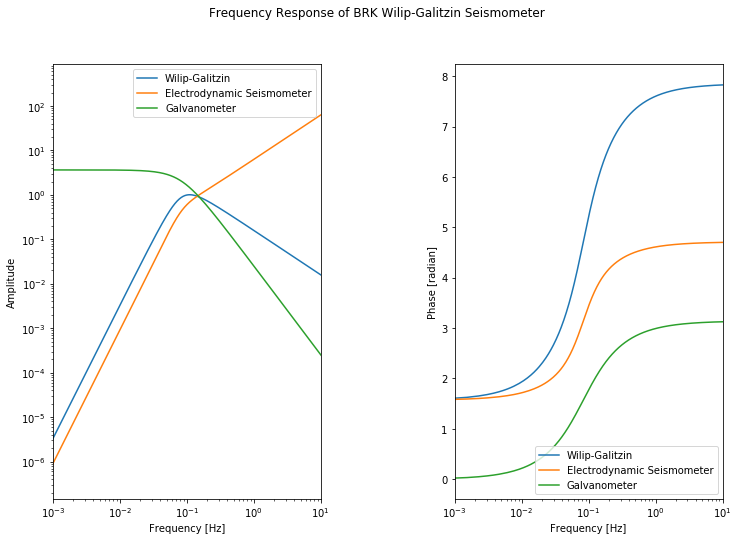

In [191]:
# plot
plt.figure()
plt.subplot(121)

h, f = paz_to_freq_resp(polesOUT, zerosOUT, scaleIn, 0.01, 16384*2*2*2, freq=True)
amp = abs(h)
plt.loglog(f, amp,label ="Wilip-Galitzin")


# electrodynaimc seismometer alone
h_s, f_s = paz_to_freq_resp(polesOUT_s, zerosOUT_s, scaleIn, 0.01, 16384*2*2*2, freq=True)
amp_s = abs(h_s)
plt.loglog(f_s, amp_s, label= "Electrodynamic Seismometer")


# galvanometer alone
h_g, f_g = paz_to_freq_resp(polesOUT_g, zerosOUT_g, scaleIn, 0.01, 16384*2*2*2, freq=True)
amp_g = abs(h_g)
plt.loglog(f_g, amp_g,label= "Galvanometer")


# plot 1 to 1000 Hz
#plt.xlim(1, 1000) 
plt.xlim(0.001, 10) 
plt.legend()

plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.subplot(122)
# take negative of imaginary part
phase = np.unwrap(np.arctan2(-h.imag, h.real))
phase_s = np.unwrap(np.arctan2(-h_s.imag, h_s.real))
phase_g = np.unwrap(np.arctan2(-h_g.imag, h_g.real))

plt.semilogx(f, phase,label ="Wilip-Galitzin")
plt.semilogx(f, phase_s, label= "Electrodynamic Seismometer")
plt.semilogx(f, phase_g,label= "Galvanometer")

#plt.xlim(1, 1000) 
plt.xlim(0.001, 10) 
plt.legend()

plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radian]')
# title, centered above both subplots
plt.suptitle('Frequency Response of BRK Wilip-Galitzin Seismometer')
# make more room in between subplots for the ylabel of right plot
plt.subplots_adjust(wspace=0.5)



plt.show()

In [192]:
# store output in pandas dataframe
df = pd.DataFrame({ 'frequency' : f,
                    'amplitude' : amp,
                    'phase': phase})

In [193]:
# save 
df.to_csv("response.csv")

In [194]:
# get event infor from IRIS

1 Event(s) in Catalog:
2017-07-06T08:03:57.220000Z | +11.111, +124.619 | 6.5 mww


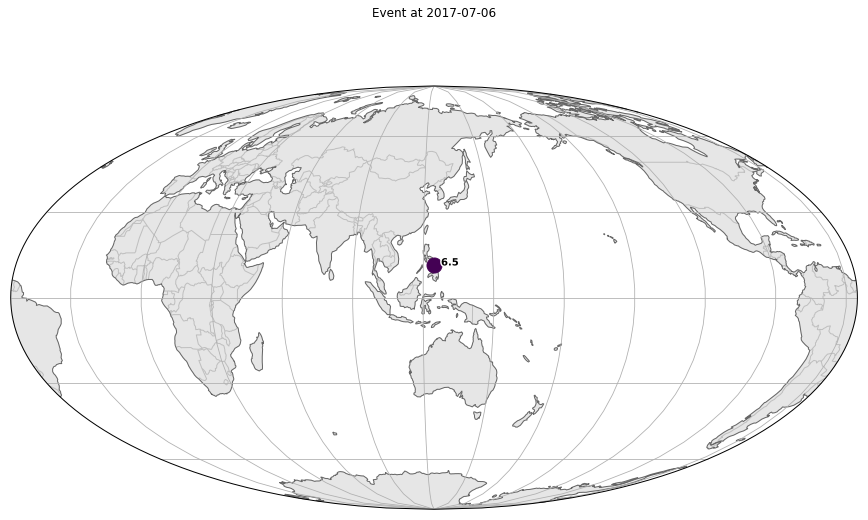

In [195]:
# https://earthquake.usgs.gov/earthquakes/eventpage/us1000976a/executive#origin
client = Client("IRIS")
st = UTCDateTime("2017-07-06T00:00:00")  # 
et = UTCDateTime("2017-07-07T00:00:00")  #

catalog = client.get_events(starttime=st , endtime=et,
                            minmagnitude=6.0)
print(catalog)
catalog.plot();

In [196]:
event = catalog[0]
origin = event.origins[0]
print(origin)

Origin
	   resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=23440854")
	          time: UTCDateTime(2017, 7, 6, 8, 3, 57, 220000)
	     longitude: 124.6194
	      latitude: 11.1111
	         depth: 6960.0
	 creation_info: CreationInfo(author='at,pt,us')


In [197]:
client = Client("NCEDC")
st = client.get_waveforms("BK", "BRK", "*", "LH*",  origin.time - 0, origin.time + 90*60 , attach_response=True)
print(st)

3 Trace(s) in Stream:
BK.BRK.00.LHE | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHN | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHZ | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples


In [198]:
st.detrend(type='demean')

3 Trace(s) in Stream:
BK.BRK.00.LHE | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHN | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHZ | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples

In [199]:
st.taper(max_percentage = 0.05)

3 Trace(s) in Stream:
BK.BRK.00.LHE | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHN | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHZ | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples

In [200]:
t1 = UTCDateTime("2017-07-06T08:20:00.00")
t2 = UTCDateTime("2017-07-06T09:03:00.00")

In [201]:
t1 = UTCDateTime("2017-07-06T08:25:00.00")
t2 = UTCDateTime("2017-07-06T08:40:00.00")

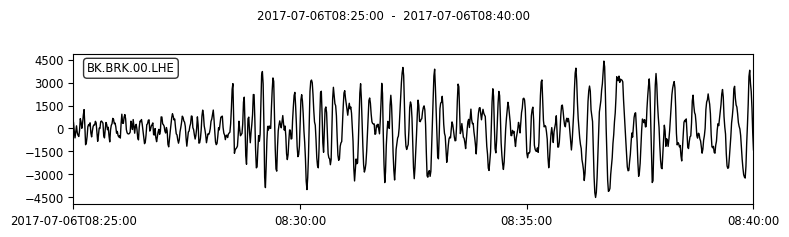

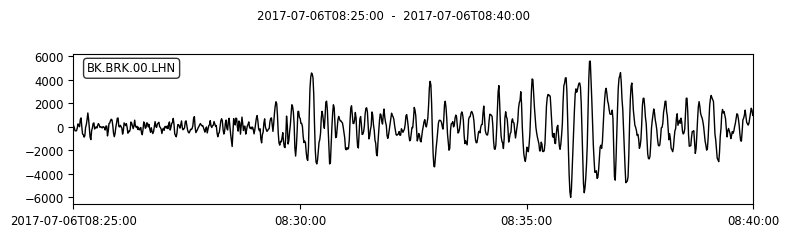

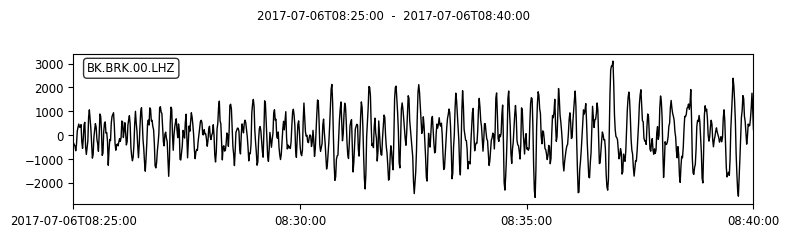

In [202]:
#  rawdata
for tr in st:
    tr.plot(starttime=t1, endtime=t2)

In [203]:
st.remove_response(output="DISP") 

3 Trace(s) in Stream:
BK.BRK.00.LHE | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHN | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHZ | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples

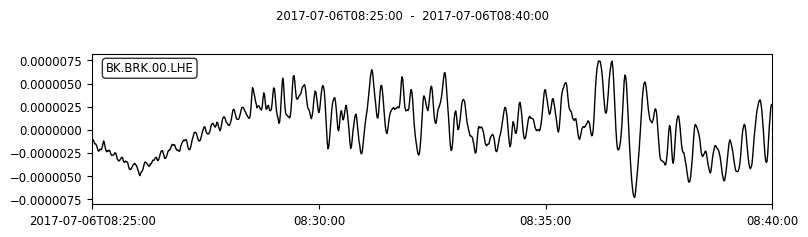

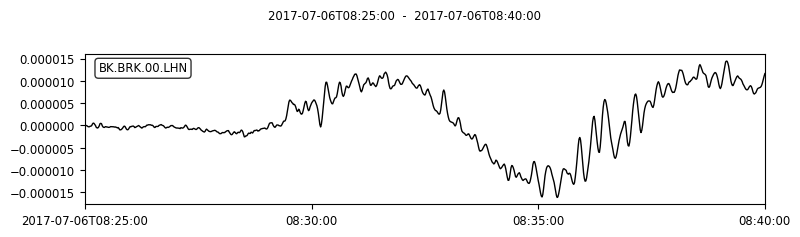

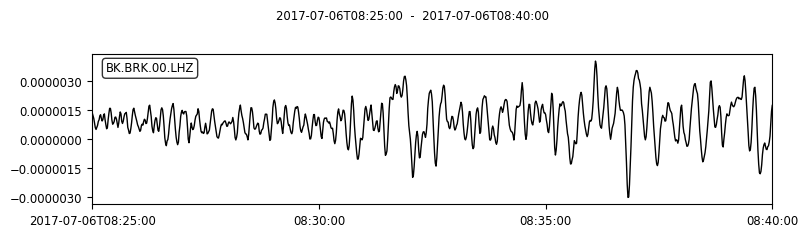

In [204]:
# displacement 
for tr in st:
    tr.plot(starttime=t1, endtime=t2)

In [205]:
#st.filter("bandpass", freqmin = 0.01, freqmax = 0.1, corners=2, zerophase=False)  


In [206]:
# bandpass 0.01-0.1 Hz
#for tr in st:
#    tr.plot(starttime=t1, endtime=t2)

In [207]:
st2 = st.copy()

In [208]:
st2.simulate(paz_remove=None, paz_simulate=paz)

3 Trace(s) in Stream:
BK.BRK.00.LHE | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHN | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples
BK.BRK.00.LHZ | 2017-07-06T08:03:58.069538Z - 2017-07-06T09:33:57.069538Z | 1.0 Hz, 5400 samples

In [209]:
t1 = UTCDateTime("2017-07-06T08:20:00.00")
t2 = UTCDateTime("2017-07-06T08:42:00.00")

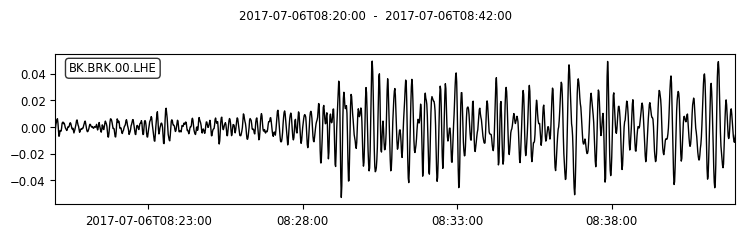

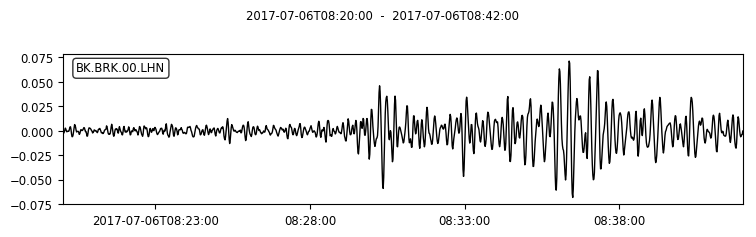

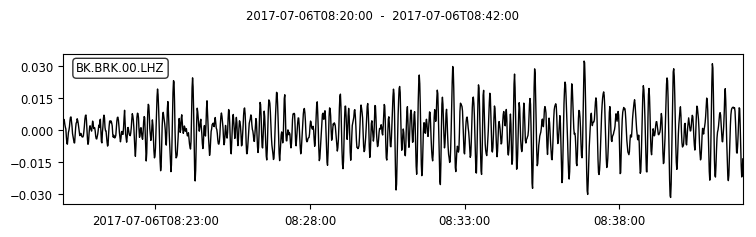

In [210]:
# Wilip-Galitzin response
for tr in st2:
    tr.plot(starttime=t1, endtime=t2)

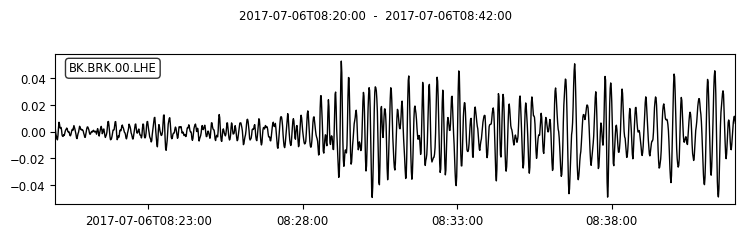

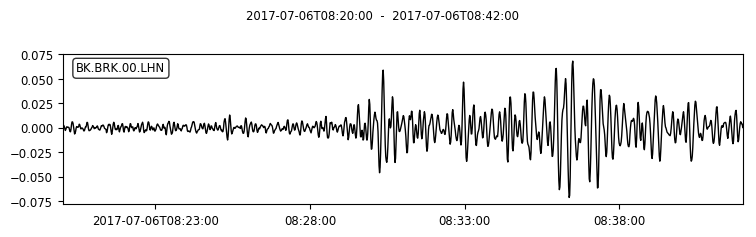

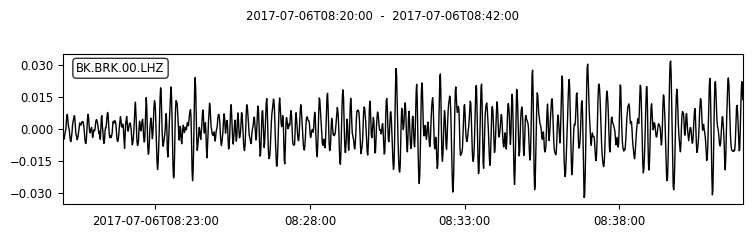

In [211]:
# Wilip-Galitzin response
for tr in st2:
    tr.data=tr.data*-1
    tr.plot(starttime=t1, endtime=t2)

In [212]:
for tr in st2: 
    tr.write(tr.id + ".sac", format="SAC") 

In [213]:
# get lhn data
lhn= st2[1]

In [214]:
#print(lhn)

In [215]:
#print(lhn.data)

In [216]:
# to get numpy array
lhn_data = lhn.data

In [217]:
#type(lhn_data)

In [218]:
# read csv files from Matlab output
#df_rtrace = pd.read_csv('rtrace6_pier3.csv')
df_rtrace = pd.read_csv('test.csv')
df_rtrace = pd.read_csv('test.v2.csv')

In [219]:
#df_rtrace.plot()

In [220]:
# interpoloate NaN 
spline_out = df_rtrace.interpolate('spline', order=3)

In [221]:
#type(spline_out)

In [222]:
from scipy.signal import detrend
from scipy.signal import resample

In [223]:
#detrend 
spline_out_detrend = detrend(spline_out.ix[:,0].values)

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [224]:
#type(spline_out_detrend)

In [225]:
# resamping 1947 data; assuming 30 min data with 1 hz sampling 30*60
#spline_out_detrend_resamp= resample(spline_out_detrend, 1800)
# v2
spline_out_detrend_resamp= resample(spline_out_detrend, 1817)


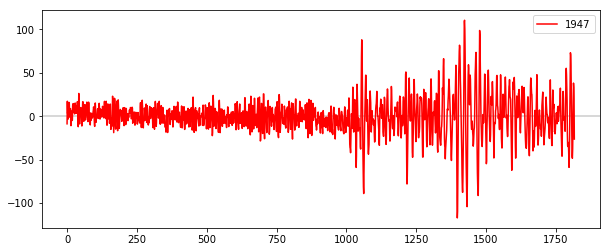

In [226]:
f, ax = plt.subplots(figsize=(10,4))
#spline_out.ix[:,0].plot(ax=ax, color='k', label='PC1')
ax.axhline(0, c='0.8')
#ax.set_xlabel('period', fontsize=18)
#ax.plot(spline_out.index, detrend(spline_out.ix[:,0].values), 'r',  label='1947')
ax.plot(spline_out_detrend_resamp, 'r', label='1947')
ax.grid('off')
ax.legend(loc=1); 

In [227]:
num = 1000 # data point of trace

In [228]:
st = 777 # starting data point for the 1947 data
et = st+num
data_1947 = spline_out_detrend_resamp[st:et]


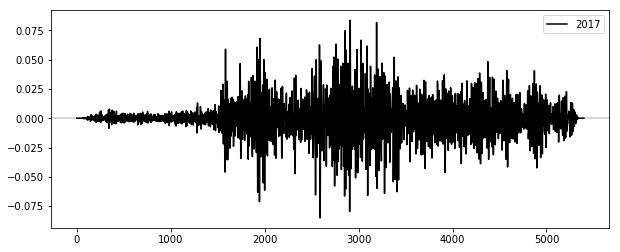

In [229]:
# plot 2017 data 
f, ax = plt.subplots(figsize=(10,4))
ax.axhline(0, c='0.8')
ax.plot(lhn_data, 'k',  label='2017')
ax.grid('off')
ax.legend(loc=1); 

In [230]:
st = 1300  # starting data point for the 2017 data
et = st+num
#print(et)
data_2017 = lhn_data[st:et]


In [231]:
#len(data_2017)

In [232]:
#len(lhn_data)

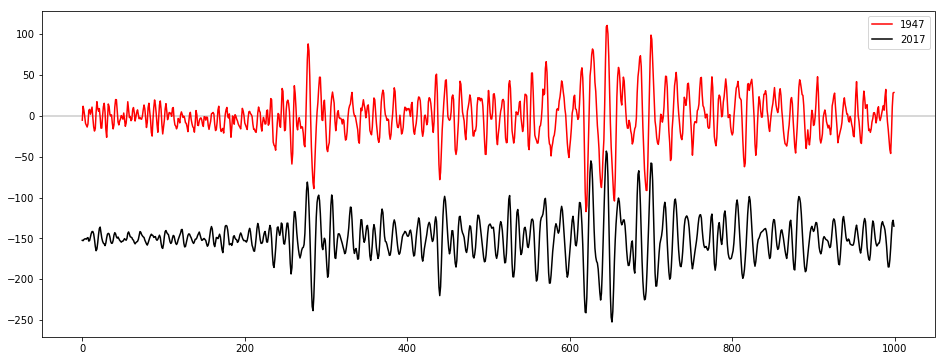

In [233]:
# plot both 1947 and 2017 data
f, ax = plt.subplots(figsize=(16,6))
ax.axhline(0, c='0.8')
ax.plot(data_1947, 'r',  label='1947')

ax.plot(data_2017*-1500-150, 'k',  label='2017')
ax.grid('off')
ax.legend(loc=1); 